# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st 
from scipy.stats import linregress

# Import API key
# enter user's key into api_key file
from api_keys import weather_api_key
if weather_api_key == "YOUR KEY HERE!":
    import sys
    path = "/Users/matth/Desktop"
    sys.path.insert(0, path)
    from API_Keys import api_key
    weather_api_key= api_key["https://openweathermap.org/"]

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#import pretty print
import pprint as pprint

#for date title in plots and filenames
from datetime import datetime

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?" 
#build url with a few other params, api key, and units imperial for temp in F and windspeed in mph.
query_url = base_url + "appid=" + weather_api_key +"&units=imperial&q="

In [4]:
#set min number of cities needed
citymin = 500



# initialize lists for data storage
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
Lat=[]
Long=[]
# include a list of cities that error out.
city_not_found=[]
#initialize count how many cities we've found weather data for.
citycount=0
#check if we have enough cities, if not, abort. if so, proceed to for loop.
if len(cities)<citymin:
    print("-----------------------------")
    print(f"Data Retrieval Aborted.")
    print(f"Rerun Generate Cities List to ensure >{citymin} cities.")
    print("-----------------------------")
else:
    print("Beginning Data Retrieval")     
    print("-----------------------------")
    #begin for loop to store records for each city
    for city in cities:
        try:
            city_url = query_url + city
            response = requests.get(city_url).json()
            # Add a one second interval between queries to (hopefully) stay within API query limits
            time.sleep(.5)
            # Use response to generate lists.
            Max_Temp.append(response["main"]["temp_max"]) 
            Humidity.append(response["main"]["humidity"])
            Cloudiness.append(response["clouds"]["all"])
            Wind_Speed.append(response["wind"]["speed"])
            Country.append(response["sys"]["country"])
            Date.append(response["dt"])
            Lat.append(response["coord"]["lat"])
            Long.append(response["coord"]["lon"])
            citycount=citycount+1
            print(f"processing record number {citycount} for | {city}")
        except:
            print(f"City: {city} not found. Marking as NaN...")
            Max_Temp.append(float("NaN")) 
            Humidity.append(float("NaN"))
            Cloudiness.append(float("NaN"))
            Wind_Speed.append(float("NaN"))
            Country.append(float("NaN"))
            Date.append(float("NaN"))
            Lat.append(float("NaN"))
            Long.append(float("NaN"))
            city_not_found.append(city)
    #end for loop, print summary.      
    print("-----------------------------")
    print("Data Retrieval Complete")  
    print(f"Records for {citycount} cities created.")
    print(f"{len(city_not_found)} cities not found and skipped. See list: city_not_found for details.")
    print("-----------------------------")
    if citycount<citymin:
        print(f"Warning: Though more than {citymin} cities were input,")
        print(f"only {citycount} cities have corresponding weather data.")
        print(f"Consider reruning from Generate Cities to boost count.")
# clears api keys after use.
weather_api_key=[]
query_url=[]
city_url=[]

Beginning Data Retrieval
-----------------------------
processing record number 1 for | hasaki
processing record number 2 for | pelym
processing record number 3 for | limon
processing record number 4 for | lebu
processing record number 5 for | rikitea
processing record number 6 for | bertoua
processing record number 7 for | jamestown
processing record number 8 for | ponta do sol
processing record number 9 for | ribeira grande
processing record number 10 for | bambous virieux
City: barentsburg not found. Marking as NaN...
processing record number 11 for | mehamn
processing record number 12 for | el vigia
processing record number 13 for | cherskiy
processing record number 14 for | banamba
processing record number 15 for | svetlogorsk
processing record number 16 for | richards bay
processing record number 17 for | dwarka
processing record number 18 for | kostomuksha
processing record number 19 for | bandarbeyla
City: illoqqortoormiut not found. Marking as NaN...
processing record number 2

processing record number 171 for | cabo san lucas
processing record number 172 for | chapais
processing record number 173 for | sanmenxia
processing record number 174 for | calama
processing record number 175 for | jinka
City: bababe not found. Marking as NaN...
processing record number 176 for | chardara
processing record number 177 for | mandera
processing record number 178 for | coahuayana
processing record number 179 for | vila franca do campo
processing record number 180 for | longyearbyen
processing record number 181 for | tongren
processing record number 182 for | igarka
processing record number 183 for | kavieng
processing record number 184 for | akyab
processing record number 185 for | hargeysa
processing record number 186 for | cayenne
processing record number 187 for | bani
City: sentyabrskiy not found. Marking as NaN...
processing record number 188 for | novyy oskol
processing record number 189 for | saint-augustin
processing record number 190 for | yulara
processing record

processing record number 344 for | bundaberg
processing record number 345 for | vao
processing record number 346 for | takoradi
processing record number 347 for | nouadhibou
processing record number 348 for | vestmannaeyjar
processing record number 349 for | pervomayskoye
processing record number 350 for | lubao
processing record number 351 for | maracacume
processing record number 352 for | prijepolje
City: umzimvubu not found. Marking as NaN...
processing record number 353 for | havre-saint-pierre
processing record number 354 for | jennings
processing record number 355 for | la reforma
processing record number 356 for | dulce grande
processing record number 357 for | otradnoye
processing record number 358 for | never
processing record number 359 for | markova
processing record number 360 for | tarakan
processing record number 361 for | luhyny
processing record number 362 for | gazanjyk
processing record number 363 for | lavumisa
processing record number 364 for | ciudad del maiz
proc

processing record number 518 for | avera
processing record number 519 for | harper
processing record number 520 for | motygino
processing record number 521 for | tuy hoa
processing record number 522 for | quatre cocos
processing record number 523 for | de-kastri
processing record number 524 for | varzea da palma
processing record number 525 for | rach gia
processing record number 526 for | labrea
processing record number 527 for | ust-tsilma
processing record number 528 for | igoumenitsa
processing record number 529 for | sola
processing record number 530 for | kapit
processing record number 531 for | honiara
processing record number 532 for | whitehorse
processing record number 533 for | abramovka
processing record number 534 for | neuquen
processing record number 535 for | dharchula
processing record number 536 for | peleduy
processing record number 537 for | kyzyl-suu
processing record number 538 for | fairbanks
processing record number 539 for | portobelo
processing record number 5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_city= {"City": cities,
               "Lat": Lat,
               "Lng": Long,
               "Max Temp": Max_Temp,
               "Humidity": Humidity,
               "Cloudiness": Cloudiness,
               "Wind Speed": Wind_Speed,
               "Country": Country,
               "Date": Date}
# this line drops any cities that could not be found, which were marked as NaN
# reset the index so it matches row number.
weather_city_df = pd.DataFrame(weather_city).dropna(how="any").reset_index(drop=True)
# view the dataframe, able to confirm row counts against the printout above.
weather_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hasaki,35.7333,140.8333,45.00,57.0,20.0,3.44,JP,1.615420e+09
1,pelym,61.0108,61.9978,-20.70,87.0,0.0,5.17,RU,1.615420e+09
2,limon,10.0000,-83.0333,82.40,74.0,75.0,12.66,CR,1.615420e+09
3,lebu,-37.6167,-73.6500,59.45,83.0,85.0,6.62,CL,1.615420e+09
4,rikitea,-23.1203,-134.9692,78.69,75.0,8.0,17.29,PF,1.615420e+09
...,...,...,...,...,...,...,...,...,...
584,balabac,7.9868,117.0645,81.86,74.0,54.0,18.63,PH,1.615420e+09
585,upington,-28.4478,21.2561,69.80,32.0,0.0,6.91,ZA,1.615420e+09
586,cururupu,-1.8283,-44.8683,75.29,90.0,95.0,2.68,BR,1.615420e+09
587,sur,22.5667,59.5289,77.07,39.0,0.0,4.99,OM,1.615420e+09


In [6]:
city_not_found

['barentsburg',
 'illoqqortoormiut',
 'coyuca',
 'maghama',
 'tsihombe',
 'kalomo',
 'one hundred mile house',
 'taolanaro',
 'belushya guba',
 'toliary',
 'bargal',
 'vaitupu',
 'marcona',
 'bacuit',
 'grand river south east',
 'bababe',
 'sentyabrskiy',
 'nizhneyansk',
 'saleaula',
 'attawapiskat',
 'amderma',
 'tostamaa',
 'meyungs',
 'tumannyy',
 'yanchukan',
 'samusu',
 'lolua',
 'tabiauea',
 'umzimvubu',
 'ardistan',
 'umm durman',
 'tabialan',
 'tartki',
 'mys shmidta',
 'warqla',
 'muzquiz',
 'samalaeulu',
 'jinchengjiang',
 'mixtepec',
 'nguiu',
 'naftah']

In [7]:
#create dataframe with count, mean, std, min, 25th percentile, 50th percentile, 75th percentile, and max.
col_list=["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]

weather_city_df_agg=pd.DataFrame({"count": weather_city_df[col_list].count(),
                                  "mean": weather_city_df[col_list].mean(),
                                  "std": weather_city_df[col_list].std(),
                                  "min": weather_city_df[col_list].min(),
                                  "25%": weather_city_df[col_list].quantile(q=0.25).tolist(),
                                  "50%": weather_city_df[col_list].quantile(q=0.5).tolist(),
                                  "75%": weather_city_df[col_list].quantile(q=0.75).tolist(),
                                  "max": weather_city_df[col_list].max()}).T
weather_city_df_agg

# can also be done with .describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,18.738081,18.909329,53.815399,73.392190,53.748727,7.782513,1.615420e+09
std,33.106254,89.287662,29.120258,20.284641,38.565141,6.031270,1.577237e+02
min,-54.800000,-179.166700,-35.250000,8.000000,0.000000,0.180000,1.615420e+09
25%,-7.844700,-58.619800,37.400000,64.000000,15.000000,3.440000,1.615420e+09
50%,20.150000,21.256100,65.170000,78.000000,65.000000,6.040000,1.615420e+09
75%,47.466700,100.317400,76.140000,88.000000,90.000000,10.360000,1.615420e+09
max,78.218600,179.316700,90.410000,100.000000,100.000000,33.380000,1.615420e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
index_bool = weather_city_df["Humidity"]>100
index_hum_over100 = [i for i in range(len(index_bool)-1) if index_bool[i]==True]
index_hum_over100 

[]

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# did not need to pass inplace. The method below preserves the data eitherway and passes clean_city_data for future work.
if len(index_hum_over100) > 0:
    clean_city_data = weather_city_df.drop(index_hum_over100).reset_index(drop=True)
else:
    clean_city_data = weather_city_df
clean_city_data.to_csv('../' + output_data_file)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hasaki,35.7333,140.8333,45.00,57.0,20.0,3.44,JP,1.615420e+09
1,pelym,61.0108,61.9978,-20.70,87.0,0.0,5.17,RU,1.615420e+09
2,limon,10.0000,-83.0333,82.40,74.0,75.0,12.66,CR,1.615420e+09
3,lebu,-37.6167,-73.6500,59.45,83.0,85.0,6.62,CL,1.615420e+09
4,rikitea,-23.1203,-134.9692,78.69,75.0,8.0,17.29,PF,1.615420e+09
...,...,...,...,...,...,...,...,...,...
584,balabac,7.9868,117.0645,81.86,74.0,54.0,18.63,PH,1.615420e+09
585,upington,-28.4478,21.2561,69.80,32.0,0.0,6.91,ZA,1.615420e+09
586,cururupu,-1.8283,-44.8683,75.29,90.0,95.0,2.68,BR,1.615420e+09
587,sur,22.5667,59.5289,77.07,39.0,0.0,4.99,OM,1.615420e+09


In [10]:
#Statistics Summary Table for clean_city_data
#create dataframe with count, mean, std, min, 25th percentile, 50th percentile, 75th percentile, and max.
col_list=["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]

clean_city_data_agg=pd.DataFrame({"count": clean_city_data[col_list].count(),
                                  "mean": clean_city_data[col_list].mean(),
                                  "std": clean_city_data[col_list].std(),
                                  "min": clean_city_data[col_list].min(),
                                  "25%": clean_city_data[col_list].quantile(q=0.25).tolist(),
                                  "50%": clean_city_data[col_list].quantile(q=0.5).tolist(),
                                  "75%": clean_city_data[col_list].quantile(q=0.75).tolist(),
                                  "max": clean_city_data[col_list].max()}).T
clean_city_data_agg

#can also be done with describe.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,18.738081,18.909329,53.815399,73.392190,53.748727,7.782513,1.615420e+09
std,33.106254,89.287662,29.120258,20.284641,38.565141,6.031270,1.577237e+02
min,-54.800000,-179.166700,-35.250000,8.000000,0.000000,0.180000,1.615420e+09
25%,-7.844700,-58.619800,37.400000,64.000000,15.000000,3.440000,1.615420e+09
50%,20.150000,21.256100,65.170000,78.000000,65.000000,6.040000,1.615420e+09
75%,47.466700,100.317400,76.140000,88.000000,90.000000,10.360000,1.615420e+09
max,78.218600,179.316700,90.410000,100.000000,100.000000,33.380000,1.615420e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [43]:
plt.style.use('ggplot')

This plot examines and displays the relationship between Lat and Max Temp for the clean_city_data.
Questions to ask might include: As Lat increases/decreases, what happens to Max Temp? Does it increase/decrease?


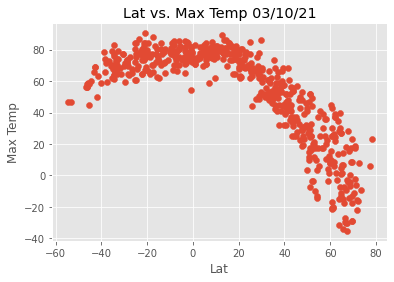

In [44]:
#params to look at
colx = "Lat"
coly = "Max Temp"

# set up x, y and title for plot
x=clean_city_data[colx]
y=clean_city_data[coly]
plot_title = colx +" vs. " + coly

#plot setup
plt.scatter(x,y)
plt.xlabel(colx)
plt.ylabel(coly)
plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Explanation
print(f"This plot examines and displays the relationship between {colx} and {coly} for the clean_city_data.")
print(f"Questions to ask might include: As {colx} increases/decreases, what happens to {coly}? Does it increase/decrease?")

## Latitude vs. Humidity Plot

This plot examines and displays the relationship between Lat and Humidity for the clean_city_data.
Questions to ask might include: As Lat increases/decreases, what happens to Humidity? Does it increase/decrease?


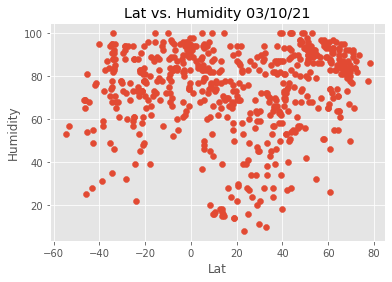

In [45]:
colx = "Lat"
coly = "Humidity"

# set up x, y and title for plot
x=clean_city_data[colx]
y=clean_city_data[coly]
plot_title = colx +" vs. " + coly

#plot setup
plt.scatter(x,y)
plt.xlabel(colx)
plt.ylabel(coly)
plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Explanation
print(f"This plot examines and displays the relationship between {colx} and {coly} for the clean_city_data.")
print(f"Questions to ask might include: As {colx} increases/decreases, what happens to {coly}? Does it increase/decrease?")

## Latitude vs. Cloudiness Plot

This plot examines and displays the relationship between Lat and Cloudiness for the clean_city_data.
Questions to ask might include: As Lat increases/decreases, what happens to Cloudiness? Does it increase/decrease?


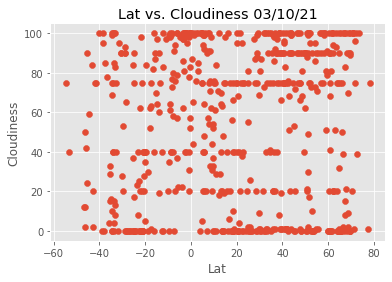

In [46]:
colx = "Lat"
coly = "Cloudiness"

# set up x, y and title for plot
x=clean_city_data[colx]
y=clean_city_data[coly]
plot_title = colx +" vs. " + coly

#plot setup
plt.scatter(x,y)
plt.xlabel(colx)
plt.ylabel(coly)
plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Explanation
print(f"This plot examines and displays the relationship between {colx} and {coly} for the clean_city_data.")
print(f"Questions to ask might include: As {colx} increases/decreases, what happens to {coly}? Does it increase/decrease?")

## Latitude vs. Wind Speed Plot

This plot examines and displays the relationship between Lat and Wind Speed for the clean_city_data.
Questions to ask might include: As Lat increases/decreases, what happens to Wind Speed? Does it increase/decrease?


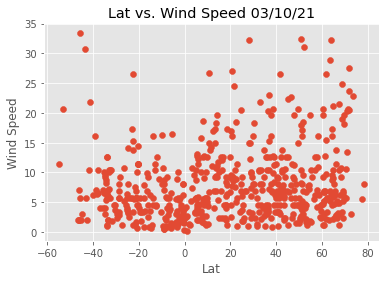

In [47]:
colx = "Lat"
coly = "Wind Speed"

# set up x, y and title for plot
x=clean_city_data[colx]
y=clean_city_data[coly]
plot_title = colx +" vs. " + coly

#plot setup
plt.scatter(x,y)
plt.xlabel(colx)
plt.ylabel(coly)
plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Explanation
print(f"This plot examines and displays the relationship between {colx} and {coly} for the clean_city_data.")
print(f"Questions to ask might include: As {colx} increases/decreases, what happens to {coly}? Does it increase/decrease?")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

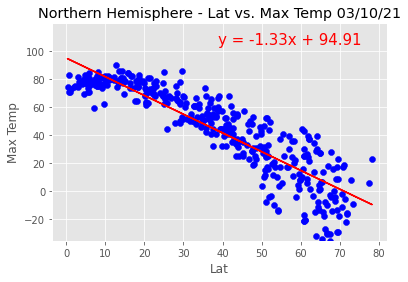

In [64]:
colx = "Lat"
coly = "Max Temp"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]>=0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min(),y.max()+30)

#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_N = round(st.pearsonr(x,y)[0],2)
slope_N=slope

In [56]:
regress_values[len(regress_values)-1]

32.644846870830584

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

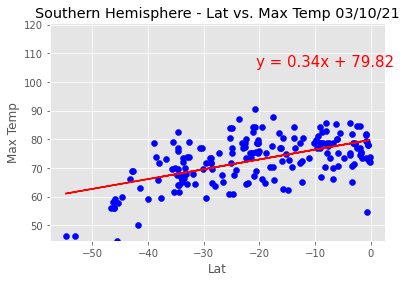

In [65]:
colx = "Lat"
coly = "Max Temp"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]<0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min(),y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_S = round(st.pearsonr(x,y)[0],2)
slope_S=slope

In [31]:
behavior=[]
slope_list = [slope_N, slope_S]
for slope in slope_list:
    if slope>0:
        behavior.append("increases")
    elif slope == 0:
        behavior.append("does not change")
    elif slope < 0:
        behavior.append("decreases")


corr_list = [correlation_N, correlation_S]
strength=[]
for correlation in corr_list:
    if 0< abs(correlation) <.39:
        strength.append("weak")
    elif .4<abs(correlation)<.65: 
            strength.append("moderate")
    elif .65<abs(correlation)<1:
            strength.append("strong")
        
print(f"For the northern hemisphere, as {colx} increases, {coly} {behavior[0]}.")
print(f"For the southern hemisphere, as {colx} increases, {coly} {behavior[1]}.")
print(f"The correlation for {colx} vs. {coly} in the Northern Hemisphere is {correlation_N} which is {strength[0]}.")
print(f"The correlation for {colx} vs. {coly} in the Southern Hemisphere is {correlation_S} which is {strength[1]}.")

For the northern hemisphere, as Lat increases, Max Temp decreases.
For the southern hemisphere, as Lat increases, Max Temp increases.
The correlation for Lat vs. Max Temp in the Northern Hemisphere is -0.89 which is strong.
The correlation for Lat vs. Max Temp in the Southern Hemisphere is 0.56 which is moderate.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

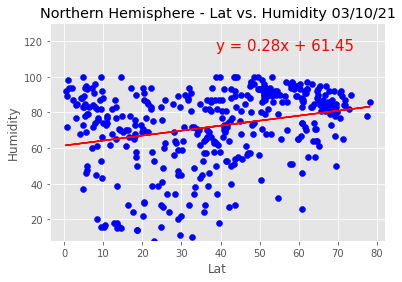

In [66]:
colx = "Lat"
coly = "Humidity"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]>=0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min(),y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_N = round(st.pearsonr(x,y)[0],2)
slope_N=slope

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

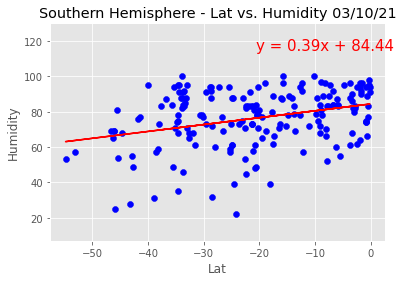

In [72]:
colx = "Lat"
coly = "Humidity"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]<0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_S = round(st.pearsonr(x,y)[0],2)
slope_S=slope

In [35]:
behavior=[]
slope_list = [slope_N, slope_S]
for slope in slope_list:
    if slope>0:
        behavior.append("increases")
    elif slope == 0:
        behavior.append("does not change")
    elif slope < 0:
        behavior.append("decreases")


corr_list = [correlation_N, correlation_S]
strength=[]
for correlation in corr_list:
    if 0< abs(correlation) <.39:
        strength.append("weak")
    elif .4<abs(correlation)<.65: 
            strength.append("moderate")
    elif .65<abs(correlation)<1:
            strength.append("strong")
        
print(f"For the northern hemisphere, as {colx} increases, {coly} {behavior[0]}.")
print(f"For the southern hemisphere, as {colx} increases, {coly} {behavior[1]}.")
print(f"The correlation for {colx} vs. {coly} in the Northern Hemisphere is {correlation_N} which is {strength[0]}.")
print(f"The correlation for {colx} vs. {coly} in the Southern Hemisphere is {correlation_S} which is {strength[1]}.")

For the northern hemisphere, as Lat increases, Humidity increases.
For the southern hemisphere, as Lat increases, Humidity increases.
The correlation for Lat vs. Humidity in the Northern Hemisphere is 0.27 which is weak.
The correlation for Lat vs. Humidity in the Southern Hemisphere is 0.33 which is weak.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

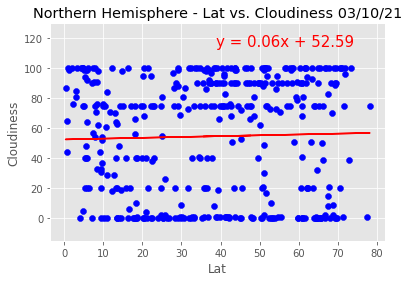

In [71]:
colx = "Lat"
coly = "Cloudiness"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]>=0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_N = round(st.pearsonr(x,y)[0],2)
slope_N=slope

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

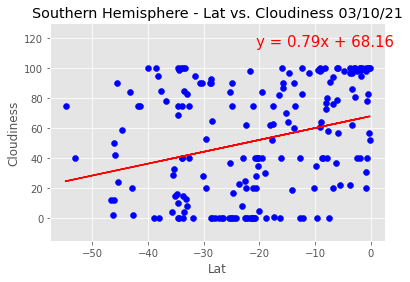

In [70]:
colx = "Lat"
coly = "Cloudiness"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]<0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_S = round(st.pearsonr(x,y)[0],2)
slope_S=slope

In [38]:
behavior=[]
slope_list = [slope_N, slope_S]
for slope in slope_list:
    if slope>0:
        behavior.append("increases")
    elif slope == 0:
        behavior.append("does not change")
    elif slope < 0:
        behavior.append("decreases")


corr_list = [correlation_N, correlation_S]
strength=[]
for correlation in corr_list:
    if 0< abs(correlation) <.39:
        strength.append("weak")
    elif .4<abs(correlation)<.65: 
            strength.append("moderate")
    elif .65<abs(correlation)<1:
            strength.append("strong")
        
print(f"For the northern hemisphere, as {colx} increases, {coly} {behavior[0]}.")
print(f"For the southern hemisphere, as {colx} increases, {coly} {behavior[1]}.")
print(f"The correlation for {colx} vs. {coly} in the Northern Hemisphere is {correlation_N} which is {strength[0]}.")
print(f"The correlation for {colx} vs. {coly} in the Southern Hemisphere is {correlation_S} which is {strength[1]}.")

For the northern hemisphere, as Lat increases, Cloudiness increases.
For the southern hemisphere, as Lat increases, Cloudiness increases.
The correlation for Lat vs. Cloudiness in the Northern Hemisphere is 0.03 which is weak.
The correlation for Lat vs. Cloudiness in the Southern Hemisphere is 0.29 which is weak.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

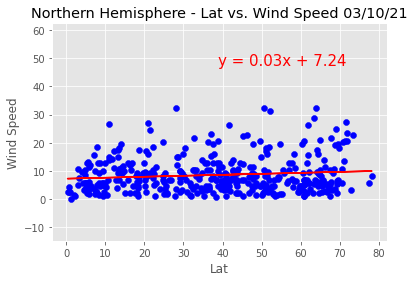

In [73]:
colx = "Lat"
coly = "Wind Speed"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]>=0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)

#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_N = round(st.pearsonr(x,y)[0],2)
slope_N=slope

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

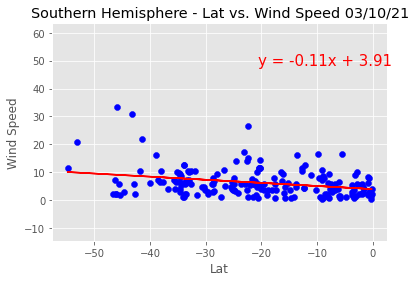

In [74]:
colx = "Lat"
coly = "Wind Speed"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]<0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)

#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_S = round(st.pearsonr(x,y)[0],2)
slope_S=slope

In [41]:
behavior=[]
slope_list = [slope_N, slope_S]
for slope in slope_list:
    if slope>0:
        behavior.append("increases")
    elif slope == 0:
        behavior.append("does not change")
    elif slope < 0:
        behavior.append("decreases")


corr_list = [correlation_N, correlation_S]
strength=[]
for correlation in corr_list:
    if 0< abs(correlation) <.39:
        strength.append("weak")
    elif .4<abs(correlation)<.65: 
            strength.append("moderate")
    elif .65<abs(correlation)<1:
            strength.append("strong")
        
print(f"For the northern hemisphere, as {colx} increases, {coly} {behavior[0]}.")
print(f"For the southern hemisphere, as {colx} increases, {coly} {behavior[1]}.")
print(f"The correlation for {colx} vs. {coly} in the Northern Hemisphere is {correlation_N} which is {strength[0]}.")
print(f"The correlation for {colx} vs. {coly} in the Southern Hemisphere is {correlation_S} which is {strength[1]}.")

For the northern hemisphere, as Lat increases, Wind Speed increases.
For the southern hemisphere, as Lat increases, Wind Speed decreases.
The correlation for Lat vs. Wind Speed in the Northern Hemisphere is 0.11 which is weak.
The correlation for Lat vs. Wind Speed in the Southern Hemisphere is -0.3 which is weak.


In [42]:
# colx = "Lat"
# coly = "Wind Speed"
# #filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
# north_hem = clean_city_data["Lat"]>=0
# south_hem = clean_city_data["Lat"]<0

# #Set up x and y for the scatter plot using params above.
# x_north=clean_city_data[north_hem][colx]
# y_north=clean_city_data[north_hem][coly]
# x_south=clean_city_data[south_hem][colx]
# y_south=clean_city_data[south_hem][coly]
# plot_title = colx +" vs. " + coly

# plot_title = title_hem + colx +" vs. " + coly
    
# #linreg (with plot equation) NORTH
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north)
# regress_values = slope*x_north + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# # subplots takes rows, columns for how many subplots
# #figsize default is 6.4 and 4.8
# fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6,12))
# ax1.plot(x_north,regress_values,"r-")
# ax1.annotate(line_eq,(x_north.median(),y_north.min()),fontsize=15,color="red")
# #plot setup
# ax1.scatter(x_north,y_north,color="blue",alpha=0.5)
# ax1.set_xlabel(colx)
# ax1.set_ylabel(coly)
# ax1.set_title( "Northern " + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

# #linreg (with plot equation) SOUTH
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south)
# regress_values = slope*x_south + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# ax2.plot(x_south,regress_values,"r-")
# #plt.annotate(line_eq,(x.median(),y.median()),fontsize=15,color="red")
# #plot setup
# ax2.scatter(x_south,y_south,color="gray")
# ax2.set_xlabel(colx)
# ax2.set_ylabel(coly)
# ax2.set_title( "Southern " + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

# #Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
# # plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')